![](../docs/banner.png)

# Nhập và lưu trữ dữ liệu
<hr>

Truy cập dữ liệu là bước khởi đầu thiết yếu trong hầu hết các quy trình làm việc của nhà khoa học dữ liệu. Đây là một chủ đề có phạm vi rộng, đủ để phát triển thành một hoặc nhiều môn học riêng. Trong khuôn khổ chương này, nội dung sẽ tập trung vào các thao tác đọc và ghi dữ liệu bằng thư viện pandas, mặc dù trong thực tiễn có nhiều công cụ bổ trợ khác có thể được sử dụng tùy theo ngữ cảnh và yêu cầu cụ thể của bài toán. Để khai thác đầy đủ các tính năng của pandas liên quan đến nhập xuất dữ liệu, bạn đọc được khuyến khích tham khảo thêm tài liệu chính thức từ thư viện này.

Các hoạt động nhập và xuất dữ liệu thường được phân loại thành một số nhóm chính như sau:

    * Đọc dữ liệu từ các tệp văn bản và các định dạng văn bản tối ưu hơn trên đĩa cứng;
    * Tải dữ liệu từ các hệ quản trị cơ sở dữ liệu;
    * Tương tác với các nguồn dữ liệu qua mạng, chẳng hạn như thông qua các API web.

## Đọc và lưu dữ liệu ở định dạng văn bản

Thư viện pandas cung cấp một số hàm để dễ dàng đọc dữ liệu dạng bảng và lưu trữ dưới dạng đối tượng `DataFrame`. Bảng ... tóm tắt khá đầy đủ, mặc dù một vài trong số đó, như `read_csv` và `read_table` có lẽ là những hàm bạn đọc sẽ sử dụng nhiều nhất.

Bảng ... các hàm đọc dữ liệu trong pandas

| Hàm         | Mô tả                                                                                                |
|---------------|------------------------------------------------------------------------------------------------------|
| `read_csv`    | Tải dữ liệu được phân tách từ một tệp, URL, hoặc đối tượng tương tự tệp; dấu phân tách mặc định là dấu phẩy             |
| `read_table`  | Tải dữ liệu được phân tách từ một tệp, URL, hoặc đối tượng tương tự tệp; dấu phân tách mặc định là ký tự tab ('\t')     |
| `read_fwf`    | Đọc dữ liệu ở định dạng cột có độ rộng cố định (tức là, không có dấu phân tách)                                              |
| `read_clipboard` | Phiên bản của `read_csv` đọc dữ liệu từ clipboard; hữu ích để chuyển đổi bảng từ các trang web thành DataFrame |
| `read_excel`  | Đọc dữ liệu dạng bảng từ tệp Excel XLS hoặc XLSX                                                              |
| `read_hdf`    | Đọc các tệp HDF5 được viết bằng pandas                                                                              |
| `read_html`   | Đọc tất cả các bảng tìm thấy trong tài liệu HTML đã cho                                                               |
| `read_json`   | Đọc dữ liệu từ một chuỗi biểu diễn JSON (JavaScript Object Notation)                                               |
| `read_feather`| Đọc định dạng tệp nhị phân Feather                                                                               |
| `read_orc`    | Đọc định dạng tệp nhị phân Apache ORC                                                                                |
| `read_parquet`| Đọc định dạng tệp nhị phân Apache Parquet                                                                           |
| `read_pickle` | Đọc một đối tượng Python tùy ý được lưu trữ ở định dạng pickle của Python                                                    |
| `read_sas`    | Đọc một tập dữ liệu SAS được lưu trữ ở một trong các định dạng tùy chỉnh của hệ thống SAS                                    |
| `read_spss`   | Đọc một tệp dữ liệu được tạo bởi SPSS                                                                              |
| `read_sql_query`| Đọc kết quả của một truy vấn SQL (sử dụng SQLAlchemy) dưới dạng DataFrame                                         |
| `read_sql_table`| Đọc toàn bộ bảng SQL (sử dụng SQLAlchemy) dưới dạng DataFrame                                                      |
| `read_stata`  | Đọc một tập dữ liệu từ định dạng tệp Stata                                                                              |
| `read_xml`    | Đọc một tập hợp các bảng tìm thấy trong một tệp XML đã cho                                                              |

Trong phần này, chúng ta sẽ cung cấp một cái nhìn tổng quan về cơ chế hoạt động của các hàm nhập dữ liệu, đặc biệt là khi làm việc với các tệp văn bản. Việc xử lý dữ liệu từ tệp văn bản thường tiềm ẩn nhiều thách thức do tính không đồng nhất của cấu trúc dữ liệu thực tế. Do đó, các hàm phân tích cú pháp trong pandas như `read_csv`, `read_table`, v.v. được thiết kế với nhiều tham số linh hoạt nhằm hỗ trợ người dùng xử lý các tình huống ngoại lệ một cách hiệu quả.

Mặc dù nhiều tham số trong số này là tùy chọn và có thể bỏ qua trong các tình huống đơn giản, nhưng để làm chủ công cụ, người học cần hiểu rõ một số tham số quan trọng thường xuyên được sử dụng.

Một số hàm như `read_csv` còn hỗ trợ cơ chế suy luận kiểu dữ liệu. Điều này đặc biệt hữu ích vì định dạng tệp không cung cấp thông tin rõ ràng về kiểu dữ liệu của từng cột. Do đó, `pandas` sẽ cố gắng tự động xác định xem một cột có chứa số thực, số nguyên, giá trị logical, hay chuỗi ký tự. Tuy nhiên, trong một số trường hợp đặc biệt — như dữ liệu ngày tháng, hoặc các kiểu dữ liệu do người dùng định nghĩa — việc suy luận tự động có thể không chính xác, và người dùng cần chỉ định rõ kiểu mong muốn để đảm bảo quá trình xử lý dữ liệu diễn ra đúng đắn.

Để minh họa, chúng ta sẽ bắt đầu với một ví dụ đơn giản: đọc một tệp CSV nhỏ bằng hàm `read_csv`

In [1]:
# Mô phỏng output:
print("a,b,c,d,message\n1,2,3,4,hello\n5,6,7,8,world\n9,10,11,12,foo")

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


Do đây là dữ liệu được phân tách bằng dấu phẩy, chúng ta có thể sử dụng `read_csv` để đọc nó vào một DataFrame:

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Hàm đọc dữ liệu của `pandas` luôn mặc định hiểu dòng đầu tiên trong tệp chứa dữ liệu là tên các cột. Như vậy, trong trường hợp dòng đầu tiên là dữ liệu chứ không phải tên cột, chúng ta sử dụng tham số `header=None`. Ví dụ chúng ta có dữ liệu như sau

In [3]:
# Để mô phỏng output:
print("1,2,3,4,hello\n5,6,7,8,world\n9,10,11,12,foo")

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


Giả sử dữ liệu được lưu trong một file .csv là "ex2.csv". Câu lệnh để đọc dữ liệu như sau:

In [4]:
pd.read_csv("data/ex2.csv", header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
Hoặc chúng ta có thể gán trực tiếp tên cột dữ liệu bằng tham số `names` trong hàm `read_csv`

SyntaxError: invalid syntax (1604754482.py, line 1)

In [13]:
pd.read_csv("data/ex2.csv", names=["a", "b", "c", "d", "message"])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Trong trường hợp bạn đọc muốn một cột, chẳng hạn cột `message` là chỉ số hàng của `DataFrame`, hãy sử dụng tham số `index_col`:

In [16]:
names = ["a", "b", "c", "d", "message"]
pd.read_csv("data/ex2.csv", names=names, index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


Trong trường hợp bạn muốn tạo một chỉ số được phân cấp qua nhiều cột, hãy khởi tạo một danh sách các số hoặc tên cột:

In [1]:
# !cat examples/csv_mindex.csv
print("key1,key2,value1,value2\none,a,1,2\none,b,3,4\none,c,5,6\none,d,7,8\ntwo,a,9,10\ntwo,b,11,12\ntwo,c,13,14\ntwo,d,15,16")

# Tạo tệp csv_mindex.csv giả lập
with open("data/csv_mindex.csv", "w") as f:
    f.write("key1,key2,value1,value2\none,a,1,2\none,b,3,4\none,c,5,6\none,d,7,8\ntwo,a,9,10\ntwo,b,11,12\ntwo,c,13,14\ntwo,d,15,16")

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [19]:
parsed = pd.read_csv("data/csv_mindex.csv",
                       index_col=["key1", "key2"])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

Trong nhiều trường hợp, một bảng có thể không sử dụng dấu phân tách cố định, mà sử dụng khoảng trắng hoặc một ký tự khác khác để tách các cột. Hãy xem xét một tệp văn bản như sau:

In [2]:
# !cat examples/ex3.txt
print("            A         B         C\naaa -0.264438 -1.026059 -0.619500\nbbb  0.927272  0.302904 -0.032399\nccc -0.264273 -0.386314 -0.217601\nddd -0.871858 -0.348382  1.100491")

# Tạo tệp ex3.txt giả lập
with open("data/ex3.txt", "w") as f: 
    f.write("            A         B         C\n")
    f.write("aaa -0.264438 -1.026059 -0.619500\n")
    f.write("bbb  0.927272  0.302904 -0.032399\n")
    f.write("ccc -0.264273 -0.386314 -0.217601\n")
    f.write("ddd -0.871858 -0.348382  1.100491\n")

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


Trong trường hợp này, chúng ta có thể sử dụng một **biểu thức chính quy** làm dấu phân tách cho `read_csv`. Khi phân tách giữa các cột là một hay một số khoảng trắng, biểu thức chính quy biểu thị là `\s+`. Do đó, hàm đọc dữ liệu sẽ như sau:

In [21]:
result = pd.read_csv("data/ex3.txt", sep="\s+")
result

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\AD\AppData\Local\Temp\ipykernel_23328\2689389327.py:1: SyntaxWarning: invalid escape sequence '\s'
  result = pd.read_csv("data/ex3.txt", sep="\s+")


,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


Trong trường hợp số lượng giá trị trong dòng chứa tên cột nhỏ hơn số lượng giá trị trong các dòng dữ liệu khác, hàm `read_csv` sẽ suy luận rằng cột đầu tiên không thuộc về dữ liệu chính mà đóng vai trò là chỉ số của đối tượng `DataFrame`. Đây là một cơ chế mặc định của `pandas` khi xử lý các tệp dữ liệu có cấu trúc không chuẩn.

Các hàm phân tích cú pháp trong `pandas` được thiết kế với nhiều tham số linh hoạt nhằm hỗ trợ người dùng xử lý các tình huống ngoại lệ có thể phát sinh trong thực tiễn. Ví dụ, nếu muốn loại bỏ một số dòng cụ thể khỏi quá trình đọc dữ liệu, người dùng có thể sử dụng tham số `skiprows`. Ví dụ chúng ta có một file .csv như sau:

In [22]:
# !cat examples/ex4.csv
print("# hey!\na,b,c,d,message\n# just wanted to make things more difficult for you\n# who reads CSV files with computers, anyway?\n1,2,3,4,hello\n5,6,7,8,world\n9,10,11,12,foo")

# Tạo tệp ex4.csv giả lập
with open("data/ex4.csv", "w") as f:
    f.write("# hey!\n")
    f.write("a,b,c,d,message\n")
    f.write("# just wanted to make things more difficult for you\n")
    f.write("# who reads CSV files with computers, anyway?\n")
    f.write("1,2,3,4,hello\n")
    f.write("5,6,7,8,world\n")
    f.write("9,10,11,12,foo\n")

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [ ]:
Chúng ta loại các dòng không cần thiết khi đọc dữ liệu như sau:

In [ ]:
pd.read_csv("data/ex4.csv", skiprows=[0, 2, 3])

Việc xử lý các giá trị không quan sát được là một vấn đề quan trọng và phức tạp. Dữ liệu không quan sát được thường được đánh dấu bằng một số giá trị sentinel. Theo mặc định, pandas sử dụng một tập hợp các giá trị sentinel phổ biến, bao gồm `NA`, `NaN,` và `NULL`:

In [3]:
# !cat examples/ex5.csv
print("something,a,b,c,d,message\none,1,2,3,4,NA\ntwo,5,6,,8,world\nthree,9,10,11,12,foo")

# Tạo tệp ex5.csv giả lập
with open("data/ex5.csv", "w") as f:
    f.write("something,a,b,c,d,message\n")
    f.write("one,1,2,3,4,NA\n")
    f.write("two,5,6,,8,world\n")
    f.write("three,9,10,11,12,foo\n")

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [6]:
result = pd.read_csv("data/ex5.csv")
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Bạn đọc có thể thấy rằng có hai giá trị không quán sát được trong `result`:

In [9]:
pd.isna(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


Tham số `na_values` được sử dụng khi đọc dữ liệu để gán giá trị cho các vị trí không quan sát được:

In [28]:
result = pd.read_csv("data/ex5.csv", na_values=["NULL"]) # Sẽ không thay đổi gì ở đây vì NULL không có trong ex5.csv và NA đã là mặc định
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Mặc dù hiếm khi xảy ra, nhưng đôi khi dữ liệu từ các hệ thống khác nhau sử dụng các giá trị có ý nghĩa thay cho giá trị không quan sát được. Do đó chúng ta cần chuyển đổi các giá trị này thành `NaN`. Phương pháp để thực hiện việc này là sử dụng một từ điển để gán giá trị cho tham số `na_values`

In [12]:
vals = {"message": ["foo", "NA"], "something": ["two", "three"]}
pd.read_csv("data/ex5.csv", na_values = vals,
              keep_default_na=False) # Thêm keep_default_na=False để NA mặc định không được dùng

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,NaN,5,6,,8,world
2,NaN,9,10,11,12,NaN


Có thể thấy rằng giá trị `foo` trong cột `message` và các giá trị `two`, `three` trong cột `something` đã được đổi thành `NaN`

Bảng .... liệt kê một số tùy chọn thường được sử dụng trong `pandas.read_csv`.

Bảng ... một số tham số của hàm `pandas.read_csv`

| Tham số          | Mô tả                                                                                                                            |
|-------------------|----------------------------------------------------------------------------------------------------------------------------------|
| `path`              | Chuỗi chỉ ra vị trí hệ thống tệp, URL, hoặc đối tượng tương tự tệp.                                                   |
| `sep` hoặc `delimiter`| Chuỗi ký tự hoặc biểu thức chính quy được sử dụng để tách các trường trong mỗi hàng.                                                         |
| `header`            | Số hàng để sử dụng làm tên cột; mặc định là 0 (dòng đầu tiên), nhưng nên là `None` nếu không có dòng tiêu đề.                           |
| `index_col`         | Số cột hoặc tên cột để sử dụng làm chỉ số hàng trong kết quả; có thể là một tên/số duy nhất hoặc một danh sách chúng cho một chỉ mục phân cấp. |
| `names`             | Danh sách tên cột cho kết quả.                                                               |
| `skiprows`          | Số dòng ở đầu tệp cần bỏ qua hoặc danh sách các số dòng (bắt đầu từ 0) cần bỏ qua.                     |
| `na_values`         | Chuỗi các giá trị cần thay thế bằng NA. Chúng được thêm vào danh sách mặc định trừ khi `keep_default_na=False` được truyền.                                                                              |
| `keep_default_na`   | Có sử dụng danh sách giá trị NA mặc định hay không (`True` theo mặc định).                                                                  |
| `comment`           | Ký tự để tách các nhận xét khỏi cuối các dòng.                                                             |
| `parse_dates`       | Cố gắng phân tích cú pháp dữ liệu thành `datetime`; `False` theo mặc định. Nếu `True`, sẽ cố gắng phân tích cú pháp tất cả các cột. Nếu không, có thể chỉ định một danh sách các số cột hoặc tên cột để phân tích cú pháp. Nếu một phần tử của danh sách là tuple hoặc danh sách, nó sẽ kết hợp nhiều cột lại với nhau và phân tích cú pháp thành ngày (ví dụ, nếu ngày/giờ được tách ra làm hai cột). |
| `keep_date_col`     | Nếu nối các cột để phân tích cú pháp ngày, giữ lại các cột đã nối; `False` theo mặc định.                                              |
| `converters`        | Từ điển chứa ánh xạ số cột hoặc tên cột tới các hàm (ví dụ, `{"foo": f}` sẽ áp dụng hàm `f` cho tất cả các giá trị trong cột "foo"). |
| `dayfirst`          | Khi phân tích cú pháp các ngày không rõ ràng, coi như định dạng quốc tế (ví dụ, `7/6/2012` -> 7 tháng 6, 2012); `False` theo mặc định. |
| `date_parser`       | Hàm để sử dụng để phân tích cú pháp ngày.                                                                                             |
| `nrows`             | Số dòng cần đọc từ đầu tệp (không tính tiêu đề).                                                                                             |
| `iterator`          | Trả về một đối tượng `TextFileReader` để đọc tệp theo từng phần. Đối tượng này cũng có thể được sử dụng với câu lệnh `with`.                                   |
| `chunksize`         | Đối với lặp lại, kích thước của các phần tệp.                                                                                   |
| `skip_footer`       | Số dòng cần bỏ qua ở cuối tệp.                                                    |
| `verbose`           | In thông tin phân tích cú pháp khác nhau, như thời gian dành cho mỗi giai đoạn của quá trình chuyển đổi tệp và thông tin sử dụng bộ nhớ.                                    |
| `encoding`          | Mã hóa văn bản (ví dụ, `"utf-8"` cho văn bản mã hóa UTF-8). Mặc định là `"utf-8"` nếu `None`.                       |
| `squeeze`           | Nếu dữ liệu được phân tích cú pháp chỉ chứa một cột, trả về một Series.                                                                   |
| `thousands`         | Dấu phân tách hàng nghìn (ví dụ, `","` hoặc `"."`); mặc định là `None`.                                                                   |
| `decimal`           | Dấu phân tách thập phân trong số (ví dụ, `"."` hoặc `","`); mặc định là `"."`.                                                        |
| `engine`            | Công cụ phân tích cú pháp và chuyển đổi CSV để sử dụng; có thể là `"c"`, `"python"`, hoặc `"pyarrow"`. Mặc định là `"c"`, mặc dù công cụ `"pyarrow"` mới hơn có thể phân tích một số tệp nhanh hơn nhiều. Công cụ `"python"` chậm hơn nhưng hỗ trợ một số tính năng mà các công cụ khác không có. |

### Đọc dữ liệu văn bản theo từng phần
<hr>

Khi xử lý các tệp dữ liệu rất lớn hoặc bạn đọc muốn tìm ra các tham số chính xác để xử lý một tệp lớn đúng cách, bạn có thể muốn chỉ đọc một phần nhỏ của tệp hoặc đọc lần lượt qua các phần nhỏ của tệp. Để tránh hiển thị dữ liệu bị tràn dòng, trước khi xem xét một tệp lớn, chúng ta sẽ hạn chế số dòng hiển thị của `pandas` như sau:

In [ ]:
pd.options.display.max_rows = 6

Sau khi thiết lập số dòng hiển thị tối đa, hãy quan sát dữ liệu giả lập sau:

In [34]:
# Tạo tệp ex6.csv giả lập lớn với 10000 dòng
import numpy as np
num_rows = 10000
data_ex6 = pd.DataFrame({
    'one': np.random.randn(num_rows),
    'two': np.random.randn(num_rows),
    'three': np.random.randn(num_rows),
    'four': np.random.randn(num_rows),
    'key': np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), num_rows)
})
data_ex6.to_csv("data/ex6.csv", index=False)

result = pd.read_csv("data/ex6.csv")
result

,one,two,three,four,key
0,-0.356175,-0.482113,-0.507278,-0.934626,W
1,1.585085,1.841935,-1.042228,-1.025426,C
2,0.640408,-1.066684,0.278641,-0.414255,F
3,0.326434,-0.458086,-1.372874,0.171574,Z
4,0.287408,0.321350,-0.128788,0.991900,C
...,...,...,...,...,...
9995,0.543649,-1.251549,-1.158379,-1.034230,B
9996,0.053509,-0.202851,-1.475204,0.834955,G
9997,0.695790,0.317303,1.993931,-1.062276,I
9998,0.010298,-1.610878,1.664979,-1.200185,V


Dấu ba chấm `...` trong hiển thị cho biết các hàng ở giữa DataFrame đã bị bỏ qua.

Nếu bạn muốn chỉ đọc một số lượng nhỏ các hàng (mà không đọc toàn bộ tệp), hãy sử dụng tham số `nrows`:

In [35]:
pd.read_csv("data/ex6.csv", nrows=5)

,one,two,three,four,key
0,-0.356175,-0.482113,-0.507278,-0.934626,W
1,1.585085,1.841935,-1.042228,-1.025426,C
2,0.640408,-1.066684,0.278641,-0.414255,F
3,0.326434,-0.458086,-1.372874,0.171574,Z
4,0.287408,0.321350,-0.128788,0.991900,C


Để đọc một tệp dữ liệu theo từng phần, hay còn được gọi là đọc theo từng "chunk", hãy chỉ định cho `chunksize` số lượng dòng mỗi lần đọc:

In [13]:
chunker = pd.read_csv("data/ex6.csv", chunksize=1000)
type(chunker)

pandas.io.parsers.readers.TextFileReader

Đối tượng `TextFileReader` được trả về bởi `pandas.read_csv` cho phép bạn lặp qua các phần của tệp theo kích thước `chunksize`. Ví dụ, chúng ta có thể lặp qua `ex6.csv`, tổng hợp các giá trị trong cột "key" như sau:

In [39]:
chunker = pd.read_csv("data/ex6.csv", chunksize=1000)
res = pd.Series([], dtype='int64') 
for piece in chunker:
    res = res.add(piece["key"].value_counts(), fill_value=0)
res = res.sort_values(ascending=False)

Sau đó, chúng ta có:

In [40]:
res[:10]

key
M    430.0
O    413.0
U    413.0
A    409.0
J    408.0
C    404.0
V    401.0
D    398.0
R    395.0
S    392.0
dtype: float64

`TextFileReader` cũng được trang bị phương thức `get_chunk` cho phép bạn đọc các phần có kích thước tùy ý.

### Ghi dữ liệu vào văn bản
<hr>

Dữ liệu sau khi được xử lý cũng có thể được xuất ra một định dạng văn bản được phân tách. Ví dụ với data đã được tạo ở trên chúng ta có thể lưu vào một file .csv như sau

In [16]:
data = pd.read_csv("data/ex5.csv") # Đọc file
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Phương thức `to_csv` của `DataFrame` được dùng để ghi dữ liệu ra một tệp được phân tách bằng dấu phẩy:

In [44]:
data.to_csv("data/out.csv") # lưu file vào đường dẫn

In [14]:
# !cat examples/out.csv
with open("data/out.csv", "r") as f:
    print(f.read())

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo



Các ký tự phân tách khác dấy phẩy cũng có thể được sử dụng bằng cách sử dụng tham số `sep`

In [ ]:
data.to_csv("data/out.csv", sep = "|")

In [ ]:
# !cat examples/out.csv
with open("data/out.csv", "r") as f:
    print(f.read())

Các giá trị bị thiếu xuất hiện dưới dạng rỗng trong văn bản đầu ra. Bạn có thể muốn biểu thị chúng bằng một số giá trị khác bằng cách sử dụng tham số `na_rep`

In [19]:
data.to_csv("data/out1.csv", na_rep="NULL")

Nếu không có các tùy chọn khác được chỉ định, cả chỉ số hàng và cột đều được ghi. Nếu bạn đọc không muốn ghi chỉ số hàng và cột, hãy sửa dụng các tham số `index` và `header` và gán bằng `False`

In [ ]:
data.to_csv(sys.stdout, index=False, header=False)

### Dữ liệu JSON
<hr>

Định dạng JavaScript Object Notation (JSON) là một chuẩn biểu diễn dữ liệu nhẹ, được thiết kế nhằm hỗ trợ trao đổi thông tin giữa các hệ thống phân tán, điển hình như kết nối giữa trình duyệt web và máy chủ qua giao thức HTTP. JSON cho phép mô tả cấu trúc dữ liệu dạng đối tượng một cách linh hoạt, dễ đọc và dễ xử lý tự động, đồng thời tương thích với hầu hết các ngôn ngữ lập trình hiện đại. So với định dạng bảng thuần túy như CSV, JSON vượt trội ở khả năng biểu diễn dữ liệu lồng nhau (nested structures), mảng (arrays) và các kiểu dữ liệu phức hợp, từ đó mở rộng phạm vi ứng dụng trong các kịch bản trao đổi dữ liệu phức tạp hơn. Dưới đây là một ví dụ minh họa cấu trúc JSON:

In [21]:
obj = """{
    "name": "Wes",
    "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
    "pet": null,
    "siblings": [{
        "name": "Scott",
        "age": 34, 
        "hobbies": ["guitars", "soccer"]
    }, {
        "name": "Katie",
        "age": 42,
        "hobbies": ["diving", "art"]
    }]
} """

Cấu trúc dữ liệu JSON có cú pháp gần giống với ngôn ngữ Python, ngoại trừ một số khác biệt về mặt cú pháp và quy ước. Cụ thể, giá trị `null` trong JSON tương ứng với `None` trong Python, và JSON không cho phép dấu phẩy đứng sau phần tử cuối cùng trong một danh sách hoặc đối tượng.

JSON hỗ trợ các kiểu dữ liệu cơ bản bao gồm: đối tượng - tương đương với kiểu từ điển trong Python, mảng tương ứng với danh sách, chuỗi ký tự, số bao gồm cả số nguyên và số thực, giá trị logical, và giá trị rỗng. Một yêu cầu quan trọng trong JSON là tất cả các khóa (keys) trong đối tượng phải được biểu diễn dưới dạng chuỗi.

Trong Python, có nhiều thư viện hỗ trợ thao tác với dữ liệu JSON, bao gồm cả các thư viện bên ngoài và các mô-đun có sẵn. Trong phạm vi cuốn sách này, chúng ta sẽ sử dụng `json`, vốn là một phần của thư viện chuẩn Python, để thực hiện việc đọc và ghi dữ liệu JSON một cách hiệu quả và thuận tiện.

Để chuyển đổi một chuỗi JSON thành dạng Python, hãy sử dụng `json.loads`:

In [22]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'cities_lived': ['Akron', 'Nashville', 'New York', 'San Francisco'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
  {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]}

`json.dumps`, ngược lại, chuyển đổi một đối tượng Python trở lại thành JSON:

In [54]:
asjson = json.dumps(result)
asjson

'{"name": "Wes", "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"], "pet": null, "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]}, {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]}'

Cách bạn chuyển đổi một đối tượng JSON hoặc danh sách các đối tượng thành `DataFrame` hoặc một cấu trúc dữ liệu khác cho phân tích sẽ tùy thuộc vào bạn. Một cách thuận tiện là truyền một danh sách các từ điển cho hàm tạo DataFrame và chọn một tập hợp con các trường dữ liệu:

In [55]:
siblings = pd.DataFrame(result["siblings"], columns=["name", "age"])
siblings

,name,age
0,Scott,34
1,Katie,42


Hàm `pandas.read_json` có thể tự động chuyển đổi các tập dữ liệu JSON theo một số cách sắp xếp cụ thể thành Series hoặc DataFrame. Ví dụ:

In [23]:
# !cat examples/example.json
print('[{"a": 1, "b": 2, "c": 3},\n {"a": 4, "b": 5, "c": 6},\n {"a": 7, "b": 8, "c": 9}]')

# Tạo tệp example.json giả lập
with open("data/example.json", "w") as f:
    f.write('[{"a": 1, "b": 2, "c": 3},\n {"a": 4, "b": 5, "c": 6},\n {"a": 7, "b": 8, "c": 9}]')

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


Các tùy chọn mặc định cho `pandas.read_json` giả định rằng mỗi đối tượng trong mảng JSON là một hàng trong bảng:

In [24]:
data = pd.read_json("data/example.json")
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


Chúng ta sẽ thực hành nhiều hơn với dữ liệu dạng JSON trong phần phân tích dữ liệu của cuốn sách này.

## Thu thập dữ liệu web
<hr>

Trong bối cảnh phân tích dữ liệu hiện đại, các nguồn dữ liệu ngày càng đa dạng và phức tạp. Bên cạnh các định dạng phổ biến như CSV, JSON hay Excel, nhiều dữ liệu có cấu trúc hiện nay được trình bày dưới dạng tài liệu HTML hoặc XML, đặc biệt là trong các ứng dụng thu thập dữ liệu từ web (web scraping) và khai thác dịch vụ web (web APIs).

HTML là viết tắt của *HyperText Markup Language* là ngôn ngữ đánh dấu tiêu chuẩn được sử dụng để xây dựng và trình bày nội dung trên các trang web. Dữ liệu HTML có cấu trúc dạng cây, trong đó mỗi phần tử được biểu diễn bằng các cặp thẻ đánh dấu (tags). Các phần tử này có thể lồng nhau và chứa thuộc tính nhằm điều khiển cách hiển thị hoặc tương tác.

HTML không được thiết kế để lưu trữ hoặc trao đổi dữ liệu, mà chủ yếu phục vụ cho mục tiêu **hiển thị nội dung trực quan** cho người dùng. Tuy nhiên, trong lĩnh vực phân tích dữ liệu, việc trích xuất thông tin từ các trang HTML, chẳng hạn như tiêu đề bài viết, bảng dữ liệu, liên kết hoặc hình ảnh, là một nhiệm vụ quan trọng.

XML là viết tắt của *eXtensible Markup Language*, hay **ngôn ngữ đánh dấu mở rộng** là một định dạng dữ liệu có cấu trúc, được thiết kế để lưu trữ và trao đổi dữ liệu giữa các hệ thống một cách linh hoạt và có thể mở rộng. Không giống như HTML, XML không có tập hợp thẻ cố định, mà cho phép người dùng định nghĩa các thẻ (tags) và cấu trúc dữ liệu phù hợp với ngữ cảnh ứng dụng. Ví dụ:

In [ ]:
xml
<product>
  <name>Máy tính xách tay</name>
  <price>15000000</price>
  <available>true</available>
</product>

Python có nhiều thư viện để đọc và ghi dữ liệu ở các định dạng HTML và XML phổ biến. Điển hình có thể kể đến `lxml`, `Beautiful Soup` và `html5lib`. Trong khi `lxml` thường nhanh hơn đáng kể trong việc phân tích cú pháp các tệp XML và HTML rất lớn, các thư viện khác như `Beautiful Soup` và `html5lib` có thể xử lý tốt hơn các tệp HTML hoặc XML có lỗi.

`pandas` sử dụng hàm `pandas.read_html` để tự động phân tích cú pháp các bảng từ các tệp HTML và cố gắng chuyển thành các đối tượng `DataFrame`. Trước  tiên, bạn đọc phải cài đặt một số thư viện bổ sung được sử dụng bởi `read_html`:

In [ ]:
# conda install lxml beautifulsoup4 html5lib
# Nếu bạn không dùng conda, pip install lxml beautifulsoup4 html5lib cũng sẽ hoạt động.

Hàm `pandas.read_html` có một số tùy chọn, nhưng hàm sẽ mặc định tìm kiếm và cố gắng phân tích cú pháp tất cả dữ liệu dạng bảng chứa trong các thẻ `<table>`. Hãy quan sát ví dụ sau, khi chúng ta muốn lấy dữ liệu về số lượng huy chương của các quốc gia trên thế giới khi tham dự các thế vận hội mùa hè và thế vận hội mùa đông từ trang web wikipedia:

In [40]:
url = "https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table"
tables = pd.read_html(url)
len(tables)

55

Đối tượng `tables` là kết quả của hàm `pd.read_html` chứa 55 `DataFrame` khác nhau có thể tìm thấy trên địa chỉ web kể trên. Bảng chúng ta cần lấy dữ liệu nằm ở vị trí thứ hai:

In [41]:
df = tables[1]
df

Team Summer Olympic Games  \
                           Team (IOC code)                  No.   
0                              Afghanistan                   16   
1                                  Albania                   10   
2                                  Algeria                   15   
3                                Argentina                   26   
4                                  Armenia                    8   
..                                     ...                  ...   
158       Individual Neutral Athletes[AIN]                    1   
159      Independent Olympic Athletes[IOA]                    3   
160  Independent Olympic Participants[IOP]                    1   
161                        Mixed team[ZZX]                    3   
162                                 Totals                   30   

                                                              \
    Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                    0                  0                  2   
1                    0                  0                  2   
2                    7                  4                  9   
3                   22                 27                 31   
4                    2                 11                  9   
..                 ...                ...                ...   
158                  1                  3                  1   
159                  1                  0                  1   
160                  0                  1                  2   
161                 11                  6                  8   
162               5793               5764               6277   

                       Winter Olympic Games                     \
    Unnamed: 5_level_1                  No. Unnamed: 7_level_1   
0                    2                    0                  0   
1                    2                    5                  0   
2                   20                    3                  0   
3                   80                   20                  0   
4                   22                    8                  0   
..                 ...                  ...                ...   
158                  5                    0                  0   
159                  2                    0                  0   
160                  3                    0                  0   
161                 25                    0                  0   
162              17834                   24               1170   

                                                              Combined total  \
    Unnamed: 8_level_1 Unnamed: 9_level_1 Unnamed: 10_level_1            No.   
0                    0                  0                   0             16   
1                    0                  0                   0             15   
2                    0                  0                   0             18   
3                    0                  0                   0             46   
4                    0                  0                   0             16   
..                 ...                ...                 ...            ...   
158                  0                  0                   0              1   
159                  0                  0                   0              3   
160                  0                  0                   0              1   
161                  0                  0                   0              3   
162               1169               1160                3500             54   

                                                                 \
    Unnamed: 12_level_1 Unnamed: 13_level_1 Unnamed: 14_level_1   
0                     0                   0                   2   
1                     0                   0                   2   
2                     7                   4                   9   
3                    22                  27                  31   
4                     2        

Dữ liệu cần được đặt tên lại cho các cột để phù hợp với mục tiêu phân tích. 

In [51]:
new_level_1 = [
    'Team (IOC code)',  # for 'Team'
    'No.', 'Gold', 'Silver', 'Bronze', 'Total',      # for 'Summer'
    'No.', 'Gold', 'Silver', 'Bronze', 'Total',      # for 'Winter'
    'No.', 'Gold', 'Silver', 'Bronze', 'Total'       # for 'Combined'
]
df.columns = pd.MultiIndex.from_tuples([
    (level0, new1) for (level0, _), new1 in zip(df.columns, new_level_1)
])
df

Team Summer Olympic Games               \
                           Team (IOC code)                  No.  Gold Silver   
0                              Afghanistan                   16     0      0   
1                                  Albania                   10     0      0   
2                                  Algeria                   15     7      4   
3                                Argentina                   26    22     27   
4                                  Armenia                    8     2     11   
..                                     ...                  ...   ...    ...   
158       Individual Neutral Athletes[AIN]                    1     1      3   
159      Independent Olympic Athletes[IOA]                    3     1      0   
160  Independent Olympic Participants[IOP]                    1     0      1   
161                        Mixed team[ZZX]                    3    11      6   
162                                 Totals                   30  5793   5764   

                  Winter Olympic Games                            \
    Bronze  Total                  No.  Gold Silver Bronze Total   
0        2      2                    0     0      0      0     0   
1        2      2                    5     0      0      0     0   
2        9     20                    3     0      0      0     0   
3       31     80                   20     0      0      0     0   
4        9     22                    8     0      0      0     0   
..     ...    ...                  ...   ...    ...    ...   ...   
158      1      5                    0     0      0      0     0   
159      1      2                    0     0      0      0     0   
160      2      3                    0     0      0      0     0   
161      8     25                    0     0      0      0     0   
162   6277  17834                   24  1170   1169   1160  3500   

    Combined total                             
               No.  Gold Silver Bronze  Total  
0               16     0      0      2      2  
1               15     0      0      2      2  
2               18     7      4      9     20  
3               46    22     27     31     80  
4               16     2     11      9     22  
..             ...   ...    ...    ...    ...  
158              1     1      3      1      5  
159              3     1      0      1      2  
160              1     0      1      2      3  
161              3    11      6      8     25  
162             54  6964   6933   7437  21334  

[163 rows x 16 columns]

Chúng ta có thể thực hiện được phân tích trên dữ liệu này. Ví dụ, chúng ta muốn so sánh tổng số lượng huy chương vàng của top 5 quốc gia có số lượng huy chương vàng nhiều nhất so với phần còn lại của thế giới:

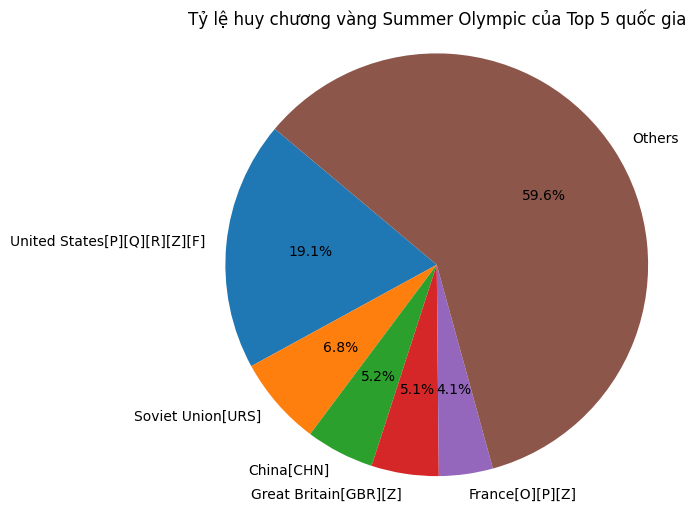

In [57]:
import matplotlib.pyplot as plt
# Tạo DataFrame mới và làm sạch
df1 = df[df[('Team', 'Team (IOC code)')] != 'Totals'] # Bỏ dòng total
teams = df1[('Team', 'Team (IOC code)')]
gold = df1[('Summer Olympic Games', 'Gold')]

df_gold = pd.DataFrame({
    'Country': teams,
    'Gold': pd.to_numeric(gold, errors='coerce')
}).dropna()

# Lấy top 5 và tính phần còn lại
df_gold_sorted = df_gold.sort_values('Gold', ascending=False)
top5 = df_gold_sorted.head(5)
top5_sum = top5['Gold'].sum()
others_sum = df_gold_sorted['Gold'].sum() - top5_sum

# Vẽ biểu đồ pie chart
labels = top5['Country'].tolist() + ['Others']
sizes = top5['Gold'].tolist() + [others_sum]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ huy chương vàng Olympic mùa hè của Top 5 quốc gia')
plt.axis('equal')  # hình tròn
plt.show()

Nhiều trang web cho phép truy cập dữ liệu dưới định đạng `xml`. Như đã trình bày ở trên, một định dạng dữ liệu có cấu trúc, được thiết kế để lưu trữ và trao đổi dữ liệu giữa các hệ thống. Ví dụ, `https://cafef.vn/index.rss` chứa nội dung thông tin về các kênh RSS do Cafef cung cấp, phù hợp để bạn theo dõi các chủ đề như thời sự, kinh tế, tài chính, ..., hoàn toàn bằng định dạng XML:

In [62]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cafef.vn/thi-truong-chung-khoan.rss"
res = requests.get(url)
soup = BeautifulSoup(res.content, 'xml')

data = []
for item in soup.find_all('item'):
    title = item.find('title').text if item.find('title') else ''
    link = item.find('link').text if item.find('link') else ''
    pubDate = item.find('pubDate').text if item.find('pubDate') else ''
    description = item.find('description').text if item.find('description') else ''
    
    data.append({
        'title': title,
        'link': link,
        'pubDate': pubDate,
        'description': description
    })

df = pd.DataFrame(data)
df

,title,link,pubDate,description
0,"“Gánh nặng” cổ phiếu dầu khí, VN-Index “quay đ...",https://cafef.vn/ganh-nang-co-phieu-dau-khi-vn...,"Wed, 25 Jun 25 16:58:00 +0700","<a href=""https://cafef.vn/ganh-nang-co-phieu-d..."
1,Phiên 25/6: Khối ngoại tiếp đà mua ròng hơn tr...,https://cafef.vn/phien-25-6-khoi-ngoai-tiep-da...,"Wed, 25 Jun 25 15:55:00 +0700","<a href=""https://cafef.vn/phien-25-6-khoi-ngoa..."
2,Một công ty Nhà nước chưa thể thoái vốn tại MSB,https://cafef.vn/mot-cong-ty-nha-nuoc-chua-the...,"Wed, 25 Jun 25 14:45:00 +0700","<a href=""https://cafef.vn/mot-cong-ty-nha-nuoc..."
3,"Lãi kỷ lục, công ty ""họ"" Viettel chốt ngày trả...",https://cafef.vn/lai-ky-luc-cong-ty-ho-viettel...,"Wed, 25 Jun 25 14:15:00 +0700","<a href=""https://cafef.vn/lai-ky-luc-cong-ty-h..."
4,Vietnam Airlines lãi rất đậm,https://cafef.vn/vietnam-airlines-lai-rat-dam-...,"Wed, 25 Jun 25 14:00:00 +0700","<a href=""https://cafef.vn/vietnam-airlines-lai..."
...,...,...,...,...
495,Một công ty hàng hải chốt ngày trả cổ tức tiền...,https://cafef.vn/mot-cong-ty-hang-hai-chot-nga...,"Thu, 29 May 25 00:46:00 +0700","<a href=""https://cafef.vn/mot-cong-ty-hang-hai..."
496,"“Ôm” lượng tiền mặt lớn hơn vốn hóa, doanh ngh...",https://cafef.vn/om-luong-tien-mat-lon-hon-von...,"Thu, 29 May 25 00:05:00 +0700","<a href=""https://cafef.vn/om-luong-tien-mat-lo..."
497,Tổng Giám đốc VNDirect nói về giá cổ phiếu VND...,https://cafef.vn/tong-giam-doc-vndirect-noi-ve...,"Thu, 29 May 25 00:04:00 +0700","<a href=""https://cafef.vn/tong-giam-doc-vndire..."
498,"Làm dự án ""quốc gia đại sự"": Việt Nam cần gần ...",https://cafef.vn/lam-du-an-quoc-gia-dai-su-vie...,"Thu, 29 May 25 00:01:00 +0700","<a href=""https://cafef.vn/lam-du-an-quoc-gia-d..."


Chúng ta có thể thực hiện các phân tích, chẳng hạn như lấy ra các thông tin có liên quan đến mã cổ phiếu HVN của hãng hàng không quốc gia Vietnam Airline:

In [63]:
df_hvn = df[
    df['title'].str.contains('vietnam airlines', case=False, na=False) |
    df['description'].str.contains('vietnam airlines', case=False, na=False)
]
df_hvn

,title,link,pubDate,description
4,Vietnam Airlines lãi rất đậm,https://cafef.vn/vietnam-airlines-lai-rat-dam-...,"Wed, 25 Jun 25 14:00:00 +0700","<a href=""https://cafef.vn/vietnam-airlines-lai..."
187,Vietnam Airlines khởi công 2 dự án gần 1.800 t...,https://cafef.vn/vietnam-airlines-khoi-cong-2-...,"Sun, 15 Jun 25 20:41:00 +0700","<a href=""https://cafef.vn/vietnam-airlines-kho..."
324,"Vietnam Airlines ""bắt tay"" hãng hàng không Tru...",https://cafef.vn/vietnam-airlines-bat-tay-hang...,"Fri, 06 Jun 25 21:33:00 +0700","<a href=""https://cafef.vn/vietnam-airlines-bat..."
444,Thủ tướng: Vietnam Airlines góp phần nâng vị t...,https://cafef.vn/thu-tuong-vietnam-airlines-go...,"Sun, 01 Jun 25 15:40:00 +0700","<a href=""https://cafef.vn/thu-tuong-vietnam-ai..."


Có thể thấy rằng có bốn thông tin chứng khoán liên quan đến HVN trong ngày 25 tháng 06 và đều là các thông tin tích cực.

## Đọc dữ liệu từ Microsoft Excel
<hr>

`pandas` cũng hỗ trợ đọc dữ liệu dạng bảng được lưu trữ trong các tệp Excel từ phiên bản 2003 bằng cách sử dụng `pandas.ExcelFile` hoặc `pandas.read_excel`. Bên trong, các công cụ này sử dụng các thư viện bổ trợ `xlrd` và `openpyxl` để đọc các tệp XLS kiểu cũ và XLSX mới hơn, tương ứng. Các thư viện này phải được cài đặt riêng biệt với `pandas`

In [64]:
## !pip install openpyxl xlrd

Để sử dụng `pandas.ExcelFile`, hãy tạo một ví dụ:

In [69]:
# Tạo tệp ex1.xlsx giả lập
df_to_excel = pd.DataFrame({
    'Unnamed: 0': [0, 1, 2],
    'a': [1, 5, 9],
    'b': [2, 6, 10],
    'c': [3, 7, 11],
    'd': [4, 8, 12],
    'message': ['hello', 'world', 'foo']
})
try:
    df_to_excel.to_excel("data/ex1.xlsx", sheet_name="Sheet1", index=False)
    xlsx = pd.ExcelFile("data/ex1.xlsx")
except ImportError:
    xlsx = None
    print("Thư viện openpyxl chưa được cài đặt. Bỏ qua ví dụ Excel.")

if xlsx:
    print(xlsx.sheet_names)

['Sheet1']


Dữ liệu được lưu trữ trong một trang tính sau đó có thể được đọc vào DataFrame bằng `parse`:

In [70]:
if xlsx:
    print(xlsx.parse(sheet_name="Sheet1"))

   Unnamed: 0  a   b   c   d message
0           0  1   2   3   4   hello
1           1  5   6   7   8   world
2           2  9  10  11  12     foo


Bảng Excel này có một cột chỉ số, vì vậy chúng ta có thể chỉ định bằng tham số `index_col`:

In [71]:
if xlsx:
    # Đọc lại với index_col, tệp gốc ex1.xlsx không có cột chỉ mục rõ ràng là cột 0
    # để khớp với output của sách, chúng ta sẽ đọc lại tệp đã tạo
    # và giả sử cột 'Unnamed: 0' là chỉ mục mong muốn
    frame_excel_indexed = xlsx.parse(sheet_name="Sheet1", index_col=0)
    print(frame_excel_indexed)

            a   b   c   d message
Unnamed: 0                       
0           1   2   3   4   hello
1           5   6   7   8   world
2           9  10  11  12     foo


Nếu bạn đang đọc nhiều trang tính trong một tệp, thì việc tạo `pandas.ExcelFile` sẽ nhanh hơn. Trong trường hợp bạn chỉ làm việc trên 1 trang tính cụ thể, bạn có thể sử dụng `pandas.read_excel`:

In [72]:
if xlsx: # Kiểm tra xem xlsx có được khởi tạo không
    frame = pd.read_excel("data/ex1.xlsx", sheet_name="Sheet1")
    print(frame)

   Unnamed: 0  a   b   c   d message
0           0  1   2   3   4   hello
1           1  5   6   7   8   world
2           2  9  10  11  12     foo


Để lưu dữ liệu `pandas` vào định dạng Excel, trước tiên bạn phải tạo một `ExcelWriter`, sau đó ghi dữ liệu vào đó bằng phương thức `to_excel`:

In [75]:
if xlsx: # Sử dụng frame từ ô trước
    try:
        writer = pd.ExcelWriter("data/ex2.xlsx")
        frame.to_excel(writer, "Sheet1")
        writer.close() # Sách gốc dùng writer.save() nhưng API mới hơn có thể dùng close()
    except ImportError:
        print("Thư viện openpyxl chưa được cài đặt để ghi Excel.")

C:\Users\AD\AppData\Local\Temp\ipykernel_23328\253195818.py:4: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  frame.to_excel(writer, "Sheet1")


Bạn cũng có thể truyền đường dẫn tệp cho `to_excel` và tránh dùng `ExcelWriter`:

In [76]:
if xlsx: # Sử dụng frame từ ô trước
    try:
        frame.to_excel("data/ex2.xlsx")
    except ImportError:
        print("Thư viện openpyxl chưa được cài đặt để ghi Excel.")

## Tương tác với API Web
<hr>

Nhiều trang web có các API công khai cung cấp nguồn cấp dữ liệu qua JSON hoặc một số định dạng khác. Có một số cách để truy cập các API này từ Python; một phương pháp mà bạn đọc nên dùng là sử dụng thư viện `requests`

In [65]:
#!pip install requests

Dưới đây là một ví dụ về truy cập dữ liệu về các tỉnh thành, huyện, thị xã, xã tại Việt Nam. 

In [ ]:
import requests

# Lấy dữ liệu tất cả tỉnh
resp = requests.get("https://provinces.open-api.vn/api/p/")
resp.raise_for_status()
provinces = pd.DataFrame(resp.json())
provinces

Sau khi có code của các tỉnh, chúng ta có thể truy cập vào các đơn vị huyện, thị xã của tỉnh. Chẳng hạn như các quận huyện của Hà Nội

In [ ]:
# Lấy dữ liệu tỉnh Hà Nội (code=01) bao gồm quận/huyện
resp2 = requests.get("https://provinces.open-api.vn/api/p/01?depth=2")
resp2.raise_for_status()
hanoi = resp2.json()
hanoi = pd.DataFrame(hanoi["districts"])
hanoi

Sau cùng là thông tin về các phường của quận Ba Đình

In [142]:
# Bước 3: Lấy phường thuộc Quận Ba Đình (code = 1)
url_ba_dinh = "https://provinces.open-api.vn/api/d/1?depth=2"
ba_dinh_data = requests.get(url_ba_dinh).json()

# Đưa vào DataFrame
df_wards = pd.DataFrame(ba_dinh_data['wards'])
print(df_wards[['code', 'name']])

    code               name
0      1     Phường Phúc Xá
1      4   Phường Trúc Bạch
2      6   Phường Vĩnh Phúc
3      7     Phường Cống Vị
4      8   Phường Liễu Giai
5     13  Phường Quán Thánh
6     16     Phường Ngọc Hà
7     19   Phường Điện Biên
8     22     Phường Đội Cấn
9     25  Phường Ngọc Khánh
10    28      Phường Kim Mã
11    31    Phường Giảng Võ
12    34  Phường Thành Công


## Tương tác với cơ sở dữ liệu
<hr>

Trong môi trường kinh doanh, nhiều dữ liệu có thể không được lưu trữ trong các tệp văn bản hoặc Excel. Các cơ sở dữ liệu quan hệ dựa trên SQL (chẳng hạn như SQL Server, PostgreSQL và MySQL) được sử dụng rộng rãi, và nhiều cơ sở dữ liệu thay thế đã trở nên khá phổ biến. Việc lựa chọn cơ sở dữ liệu thường phụ thuộc vào hiệu suất, tính toàn vẹn dữ liệu và nhu cầu mở rộng của một ứng dụng.

`pandas` có một số hàm để đơn giản hóa việc tải kết quả của một truy vấn SQL vào DataFrame. Ví dụ, chúng tôi sẽ tạo một cơ sở dữ liệu SQLite3 bằng trình điều khiển `sqlite3` tích hợp sẵn của Python:

In [ ]:
import sqlite3

query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""

con = sqlite3.connect("mydata.sqlite")
try:
    con.execute(query)
    con.commit()
except sqlite3.OperationalError as e:
    print(f"Lỗi khi tạo bảng (có thể bảng đã tồn tại): {e}")

Sau đó, chèn một vài hàng dữ liệu:

In [ ]:
data_sql = [("Atlanta", "Georgia", 1.25, 6),
            ("Tallahassee", "Florida", 2.6, 3),
            ("Sacramento", "California", 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

try:
    con.executemany(stmt, data_sql)
    con.commit()
except sqlite3.IntegrityError as e:
    print(f"Lỗi khi chèn dữ liệu (có thể dữ liệu đã tồn tại): {e}")

Hầu hết các trình điều khiển SQL Python trả về một danh sách các tuple khi chọn dữ liệu từ một bảng:

In [ ]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()
rows

Bạn có thể truyền danh sách các tuple cho hàm tạo DataFrame, nhưng bạn cũng cần tên cột, chứa trong thuộc tính `description` của con trỏ. Lưu ý rằng đối với SQLite3, mô tả con trỏ chỉ cung cấp tên cột, nhưng đối với một số trình điều khiển cơ sở dữ liệu khác, thông tin cột được cung cấp nhiều hơn:

In [ ]:
cursor.description

In [ ]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

Đây là khá nhiều công việc xử lý mà bạn không muốn lặp lại mỗi khi truy vấn cơ sở dữ liệu. Dự án SQLAlchemy là một bộ công cụ SQL Python phổ biến giúp trừu tượng hóa nhiều khác biệt phổ biến giữa các cơ sở dữ liệu SQL. pandas có hàm `read_sql` cho phép bạn đọc dữ liệu dễ dàng từ một kết nối SQLAlchemy chung. Bạn có thể cài đặt SQLAlchemy bằng conda như sau:

In [ ]:
# conda install sqlalchemy

Bây giờ, chúng ta sẽ kết nối với cùng một cơ sở dữ liệu SQLite bằng SQLAlchemy và đọc dữ liệu từ bảng đã tạo trước đó:

In [ ]:
try:
    import sqlalchemy as sqla
    db = sqla.create_engine("sqlite:///mydata.sqlite")
    print(pd.read_sql("SELECT * FROM test", db))
except ImportError:
    print("Thư viện SQLAlchemy chưa được cài đặt. Bỏ qua ví dụ SQLAlchemy.")
finally:
    con.close() # Đóng kết nối sqlite3 ban đầu
    # Xóa tệp sqlite để các lần chạy sau không bị lỗi
    if os.path.exists("mydata.sqlite"):
        os.remove("mydata.sqlite")

Nhập dữ liệu thường là bước đầu tiên trong quy trình phân tích dữ liệu. Chúng ta đã xem xét một số công cụ hữu ích trong chương này sẽ giúp bạn bắt đầu. Trong các chương sắp tới, chúng ta sẽ tìm hiểu sâu hơn về xử lý dữ liệu, trực quan hóa dữ liệu, phân tích chuỗi thời gian và các chủ đề khác.